# Avito first contact

This is my first contact with "Avito Demand Prediction Challenge". I have set up my environement. My model is very simple but it's only a test.

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.utils import shuffle

In [3]:
import seaborn as sns

In [4]:
from time import gmtime, strftime #Time to name the submission.

In [5]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

## Import of the data

/media/alex/Ext4/DataSet/Avito/train/train.csv

In [6]:
train_path = "/media/alex/Ext4/DataSet/Avito/train/train.csv"

In [7]:
train = pd.read_csv(train_path)

In [8]:
print("Train file rows and columns are : ", train.shape)

Train file rows and columns are :  (1503424, 18)


In [9]:
train.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

## Split the training set

In [10]:
#Set the ramdom seed to always have the same sub-dataset.
np.random.seed(2018)

#We shuffle all the data, can be useful.
train_s = shuffle(train) 

#We split the training set in egal two part.

# Data set to train the model.
train_train = train_s[0:len(train_s)//2]

# Data check the accuracy of the model.
train_test = train_s[len(train_s)//2:len(train_s)]

## Plots

/home/alex/anaconda3/envs/deep-learning/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



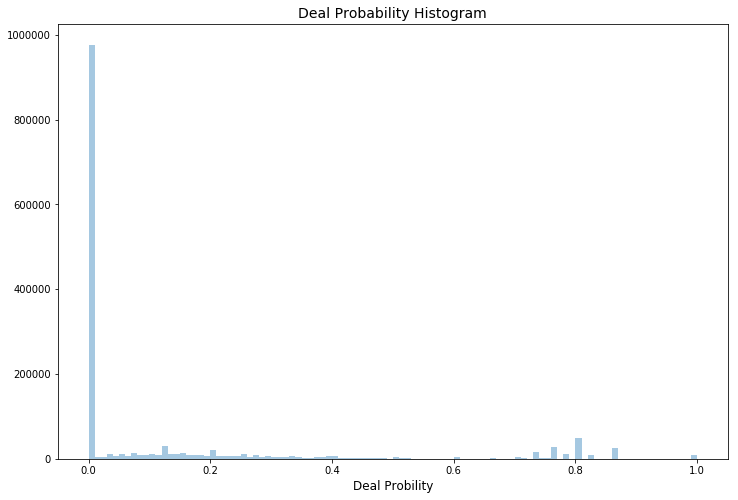

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(train["deal_probability"].values, bins=100, kde=False)
plt.xlabel('Deal Probility', fontsize=12)
plt.title("Deal Probability Histogram", fontsize=14)
plt.show()

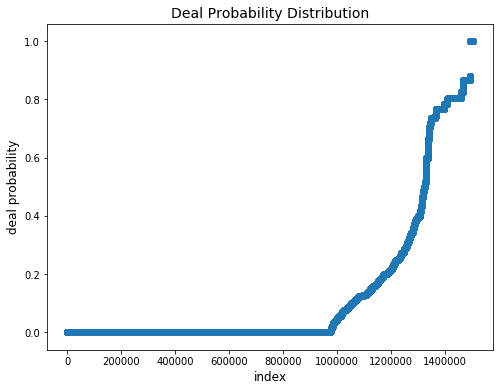

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train['deal_probability'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('deal probability', fontsize=12)
plt.title("Deal Probability Distribution", fontsize=14)
plt.show()

City, parent_category_name, category_name, date, user_type, image

## Some tests

## New variables

Weekday, image/NoImage, nbWord Header, nbWord Description,

## Drop cols

In [13]:
cols_to_drop = ["item_id", "user_id", "title", "description", "activation_date", "image"]

## Encoding

## Train the model

## Apply the model to the test dataset

In [14]:
test_path = "/media/alex/Ext4/DataSet/Avito/test/test.csv"
test = pd.read_csv(test_path)

In [15]:
# The first model is very simple,
# we use the mean of deal_probability
# and we apply it to all the test dataset.

In [16]:
mean_train_deal_probability = train["deal_probability"].mean()

## Make the submission file

In [17]:
# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pd.DataFrame({
        "item_id": test["item_id"],
        "deal_probability": mean_train_deal_probability,
    })


columnsTitles = ['item_id', 'deal_probability']
submission= submission.reindex(columns=columnsTitles)

In [18]:
nameOfSubmission = 'submission_'+strftime("%Y%m%d%H%M%S", gmtime())+'.csv'

In [19]:
nameOfSubmission

'submission_20180506234420.csv'

In [20]:
submission.to_csv(nameOfSubmission, index=False)